In [1]:
!pip install pyLDAvis
!pip install --upgrade pandas==1.2
!pip install textstat
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
!pip install cartopy

Requirement already up-to-date: pandas==1.2 in /usr/local/lib/python3.7/dist-packages (1.2.0)
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/main/liba/libarchive/libarchive-dev_3.2.2-3.1ubuntu0.6_amd64.deb  404  Not Found [IP: 91.189.88.152 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?
  Using cached https://files.pythonhosted.org/packages/ed/ca/524ce33692df3faeaa56852fb6a33b0b410be94cc288417565b96fef3f64/Cartopy-0.19.0.post1.tar.gz
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 225kB 9.3MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516188 sha256=19b15104b8897547d9e7de9b4c6af2d30fa0cf367f27312ec9d1831ff6efcc50
  Stored in directory: /root/.cache/pip/wheels/45/7f/3b/37879587817fd1bbbee7b47312e2401b4f542cccf2fbe9b4ee
Successfully built cartopy
  Created wheel for 

In [2]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2021-06-14 12:17:17--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  7.62MB/s    in 2.0s    

2021-06-14 12:17:19 (7.62 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [10]:
#Loading libraries

# import libarchive
import pydot
import cartopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

#for displaying 500 results in pandas dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import re
import gensim
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from collections import defaultdict,Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
nltk.download('stopwords')


stop=set(stopwords.words('english'))
plt.style.use('seaborn')


from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import textstat
from textblob import TextBlob 
from tqdm import tqdm
from statistics import *
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from gensim import corpora
import gensim
import pyLDAvis
import pyLDAvis.gensim_models
import pickle
from gensim.models.wrappers import LdaMallet
import os.path
import re
import glob
from gensim.models import CoherenceModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
images_dir = '/content/gdrive/MyDrive/Statistical computing Final project/images'

In [5]:
from google.colab import drive
drive.mount('/content/gdrive') # 此處需要登入google帳號

Mounted at /content/gdrive


In [6]:
# from google.colab import drive
# import pandas as pd

# # 獲取授權碼之後輸入即可連動雲端硬碟
# train = pd.read_csv("/content/gdrive/MyDrive/Statistical computing Final project/data/Corona_NLP_train.csv",encoding='latin1')
# test = pd.read_csv("/content/gdrive/MyDrive/Statistical computing Final project/data/Corona_NLP_test.csv",encoding='latin1')
# train['OriginalTweet']=train['OriginalTweet'].astype(str)
# train['Sentiment']=train['Sentiment'].astype(str)
# test['OriginalTweet']=test['OriginalTweet'].astype(str)
# test['Sentiment']=test['Sentiment'].astype(str)
df=pd.read_csv("/content/gdrive/MyDrive/Statistical computing Final project/files/lemma_text.csv",encoding='latin1')
df.head()

,lemma_text,sentiment
0,menyrbie phil_gahan chrisitv,neutral
1,advice talk neighbour family exchange phone nu...,positive
2,coronavirus australia woolworth give elderly d...,positive
3,food stock one empty please dont panic enough ...,positive
4,ready go supermarket covid outbreak im paranoi...,negative


In [ ]:
# text=df['lemma_text'].to_frame().reset_index()
# text=text.drop(columns=['index'])
# text.to_csv (r'/content/gdrive/MyDrive/Statistical computing Final project/files/tweet.csv', index = False, header=True)

## 取出適合的text

In [ ]:
# import spacy
# spacy.load('en_core_web_sm')
# from spacy.lang.en import English
# parser = English()
# #將資料tokenize
# def tokenize(text):
#     #準備一list
#     lda_tokens=[]
#     #透過spacy的English模型 對text處理
#     tokens = parser(text)
#     for token in tokens:
#         if token.orth_.isspace():
#             continue
#         elif token.like_url:
#             lda_tokens.append('URL')
#         elif token.orth_.startswith('@'):
#             lda_tokens.append('SCREEN_NAME')
#         else:
#             lda_tokens.append(token.lower_)
#     return lda_tokens
# import nltk
# nltk.download('wordnet')
# from nltk.corpus import wordnet as wn
# def get_lemma(word):
#     """
#     >>> print(wn.morphy('dogs'))
#     dog
#     >>> print(wn.morphy('churches'))
#     church
#     >>> print(wn.morphy('aardwolves'))
#     aardwolf
#     """
#     lemma = wn.morphy(word)
    
#     if lemma is None:
#         #返回原本的字
#         return word
#     else:
        
#         return lemma
    
# from nltk.stem.wordnet import WordNetLemmatizer

# def get_lemma2(word):
#     return WordNetLemmatizer().lemmatize(word)

In [ ]:
# def prepare_text_for_lda(text):
#     #將文字tokenize
#     tokens = tokenize(text)
#     #只要長度>4
#     tokens =[token for token in tokens if len(token)>4]
#     #這些字不能在stopword
#     # tokens =[token for token in tokens if token not in en_stop]
#     return tokens
# import random
# text_data = []
# with open('/content/gdrive/MyDrive/Statistical computing Final project/files/tweet.csv') as f:
#     for line in f:
#         tokens =prepare_text_for_lda(line)
#         if random.random() >.99:
#             print(tokens)
#             text_data.append(tokens)
# import numpy as np
# text_data2=np.array(text_data)
# np.save("/content/gdrive/MyDrive/Statistical computing Final project/files/text_data.npy",text_data2) # 保存为.npy格式

In [6]:
#挑選完的token
a=np.load('/content/gdrive/MyDrive/Statistical computing Final project/files/text_data.npy',allow_pickle=True)
a=a.tolist()

In [7]:
#透過gensim以text_data建立字典
dictionary =corpora.Dictionary(a)
#語料庫
corpus = [dictionary.doc2bow(token) for token in a]

## 選擇 LdaModel 的 coherence value

In [8]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [11]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=a, start=2, limit=40, step=6)

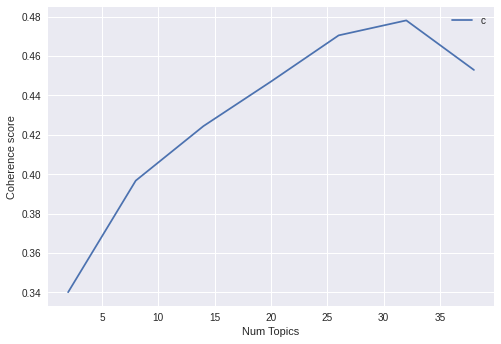

In [12]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.savefig(f"{images_dir}/LDA coherence plot.png")
plt.show()

In [19]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3227
Num Topics = 8  has Coherence Value of 0.3811
Num Topics = 14  has Coherence Value of 0.4177
Num Topics = 20  has Coherence Value of 0.4478
Num Topics = 26  has Coherence Value of 0.4631
Num Topics = 32  has Coherence Value of 0.4589
Num Topics = 38  has Coherence Value of 0.4597


In [22]:
#透過LDA找到32個 topics
NUM_TOPICS  = 32
ldamodel32 = gensim.models.ldamodel.LdaModel(\
    corpus,num_topics = NUM_TOPICS ,id2word=dictionary,passes=100,alpha='auto',chunksize=2000,per_word_topics=True)
ldamodel32.save('/content/gdrive/MyDrive/Statistical computing Final project/files/model5-32.gensim')

topics = ldamodel32.print_topics(num_words=5)
for topic in topics:
    print(topic)

(31, '0.012*"online" + 0.012*"communities" + 0.012*"villages" + 0.012*"shopping" + 0.006*"prices"')
(7, '0.021*"coronavirus" + 0.011*"prices" + 0.011*"production" + 0.011*"shopping" + 0.011*"estate"')
(4, '0.012*"coronavirus" + 0.012*"covid" + 0.012*"helping" + 0.012*"paper" + 0.012*"store"')
(2, '0.022*"covid" + 0.016*"store" + 0.011*"grocery" + 0.011*"demand" + 0.011*"coronavirus"')
(26, '0.026*"covid" + 0.020*"check" + 0.020*"coronavirus" + 0.015*"theyã£ã¢re" + 0.010*"people"')
(15, '0.027*"covid" + 0.014*"supermarket" + 0.009*"coronavirus" + 0.009*"village" + 0.009*"visits"')
(17, '0.011*"china" + 0.011*"coronavirus" + 0.011*"customers" + 0.011*"covid" + 0.011*"works"')
(14, '0.031*"covid" + 0.023*"workers" + 0.019*"staff" + 0.015*"coronavirus" + 0.015*"scams"')
(5, '0.025*"covid" + 0.025*"supermarket" + 0.010*"please" + 0.010*"gloves" + 0.010*"store"')
(11, '0.027*"coronavirus" + 0.014*"supermarket" + 0.014*"march" + 0.009*"quarantine" + 0.009*"facebook"')
(28, '0.036*"coronavirus

In [23]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel32.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel32, texts=a, dictionary=dictionary, coherence='c_v')
coherence_lda32 = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda32)


Perplexity:  -8.32693149590245

Coherence Score:  0.41945860673679325


## 選擇 LdaMallet 的 coherence value

In [25]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [26]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=a, start=2, limit=40, step=6)

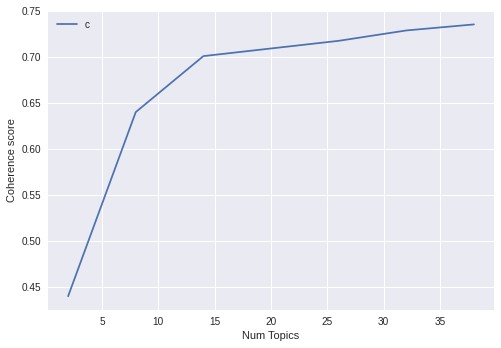

In [30]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.savefig(f"{images_dir}/LDA mallet coherence plot.png")
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4396
Num Topics = 8  has Coherence Value of 0.64
Num Topics = 14  has Coherence Value of 0.7009
Num Topics = 20  has Coherence Value of 0.7092
Num Topics = 26  has Coherence Value of 0.7175
Num Topics = 32  has Coherence Value of 0.7288
Num Topics = 38  has Coherence Value of 0.7354


In [13]:
import pickle

os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=5, id2word=dictionary)
pickle.dump(ldamallet, open("/content/gdrive/MyDrive/Statistical computing Final project/files/model5-5.pkl", "wb"))

# Show Topics
print(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=a, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0, [('coronavirus', 0.12556869881710647), ('store', 0.060964513193812554), ('grocery', 0.05368516833484986), ('today', 0.018198362147406732), ('sanitizer', 0.018198362147406732), ('paper', 0.01091901728844404), ('toilet', 0.00818926296633303), ('donã£ã¢t', 0.00818926296633303), ('front', 0.007279344858962694), ('hoarding', 0.007279344858962694)]), (1, [('supermarket', 0.07556427870461237), ('essential', 0.018645731108930325), ('local', 0.018645731108930325), ('workers', 0.014720314033366046), ('items', 0.012757605495583905), ('retail', 0.011776251226692836), ('supermarkets', 0.011776251226692836), ('crisis', 0.011776251226692836), ('outbreak', 0.009813542688910697), ('goods', 0.009813542688910697)]), (2, [('people', 0.06906906906906907), ('stores', 0.021021021021021023), ('prices', 0.02002002002002002), ('stock', 0.02002002002002002), ('coronavirus', 0.01901901901901902), ('market', 0.014014014014014014), ('online', 0.013013013013013013), ('toiletpaper', 0.012012012012012012), ('soci

In [ ]:
import pickle

os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=32, id2word=dictionary)
pickle.dump(ldamallet, open("/content/gdrive/MyDrive/Statistical computing Final project/files/model5-32.pkl", "wb"))

# Show Topics
print(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=a, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(26, [('consumer', 0.07432432432432433), ('government', 0.05405405405405406), ('times', 0.0472972972972973), ('trump', 0.033783783783783786), ('report', 0.033783783783783786), ('outbreak', 0.02702702702702703), ('lockdown', 0.02702702702702703), ('needed', 0.02027027027027027), ('operating', 0.02027027027027027), ('response', 0.02027027027027027)]), (4, [('local', 0.10344827586206896), ('workers', 0.10344827586206896), ('delivery', 0.034482758620689655), ('staff', 0.028735632183908046), ('alert', 0.022988505747126436), ('panicking', 0.017241379310344827), ('related', 0.017241379310344827), ('america', 0.017241379310344827), ('advertising', 0.017241379310344827), ('thrown', 0.011494252873563218)]), (23, [('prices', 0.1404494382022472), ('business', 0.03932584269662921), ('social', 0.033707865168539325), ('morning', 0.028089887640449437), ('lines', 0.028089887640449437), ('businesses', 0.02247191011235955), ('increased', 0.016853932584269662), ('sanitizer', 0.011235955056179775), ('rest

## 導入字典

In [14]:
#我們導入剛剛訓練並儲存過後的字典，這個方式可以讓我們每次都可以使用同一個字典
dictionary = gensim.corpora.Dictionary.load('/content/gdrive/MyDrive/Statistical computing Final project/files/dictionary.gensim')
# corpus = pickle.load(open('corpus.pkl', 'rb'))
# 導入有5個主題的LDA topic model
lda32 = gensim.models.ldamodel.LdaModel.load('/content/gdrive/MyDrive/Statistical computing Final project/files/model5-32.gensim')
lda5 = gensim.models.ldamodel.LdaModel.load('/content/gdrive/MyDrive/Statistical computing Final project/files/model5-5.gensim')
lda_m32 = pickle.load(open("/content/gdrive/MyDrive/Statistical computing Final project/files/model5-32.pkl", "rb"))
lda_m5 = pickle.load(open("/content/gdrive/MyDrive/Statistical computing Final project/files/model5-5.pkl", "rb"))

## pyLDAvis

In [18]:
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim_models.prepare(lda5,corpus,dictionary)
pyLDAvis.display(lda_display) # ldamodel with topics=5
# pyLDAvis.save_html(lda_display, '/content/gdrive/MyDrive/Statistical computing Final project/images/lda5.html')

In [59]:
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim_models.prepare(lda32,corpus,dictionary)
pyLDAvis.display(lda_display) # ldamodel with topics=32
# pyLDAvis.save_html(lda_display, '/content/gdrive/MyDrive/Statistical computing Final project/images/lda32.html')

In [16]:
from gensim.models.ldamodel import LdaModel
def convertldaMalletToldaGen(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) 
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim
ldagensim = convertldaMalletToldaGen(lda_m32)
pyLDAvis.enable_notebook()
vis_data = pyLDAvis.gensim_models.prepare(ldagensim, corpus, dictionary, sort_topics=False)
pyLDAvis.display(vis_data)  # lda mallet with topics=32
# pyLDAvis.save_html(lda_display, '/content/gdrive/MyDrive/Statistical computing Final project/images/lda_m32.html')

In [17]:
ldagensim5 = convertldaMalletToldaGen(lda_m5)
pyLDAvis.enable_notebook()
vis_data = pyLDAvis.gensim_models.prepare(ldagensim5, corpus, dictionary, sort_topics=False)
pyLDAvis.display(vis_data)  # lda mallet with topics=5
# pyLDAvis.save_html(lda_display, '/content/gdrive/MyDrive/Statistical computing Final project/images/lda_m5.html')

## Topics & word clouds

In [42]:
tm_results = lda_m32[corpus]
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]
topics = [[(term, round(wt, 3)) for term, wt in lda_m32.show_topic(n, topn=20)] for n in range(0, lda_m32.num_topics)]

In [44]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)], index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
# topics_df.head()
# set column width
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )
topics_df

,Terms per Topic
Topic1,"covid, prices, putting, price, lives, idaho, ashrafghani, medicines, poetry, combat, idahocovid, 15396,online, received, citizensadvice, outta, ignoring, measures, 8526,basically, 26497,department, repatriation"
Topic2,"covid, country, sense, closed, soaps, insurance, countries, events, yangon, taste, employee, hunte, ã£ã¢reportã£ã¢, market, direct, idontusetwittermuch, 23359,covid, fatalities, 23401,access, texas"
Topic3,"retail, china, covid, virus, spain, netherlands, morons, fresh, older, payment, bought, black, article, station, dodheld, 36067,bryandbender, managing, director, withering, stealing"
Topic4,"coronavirus, toiletpaper, stocked, donã£ã¢t, pharmacy, brings, tesco, spotify, employees, askreuters, panel, surrounded, financial, magic, offices, 24957,iã£ã¢ll, 43089,fuck, rahulsh, stranger, supermarket"
Topic5,"local, workers, delivery, staff, alert, panicking, related, america, advertising, qurantine, thrown, points, present, hungry, uncertainty, callout, overblown, company, wrong, bradpaisley"
Topic6,"coronavirus, people, supply, waiting, important, slowing, spreading, testing, galway, attention, stocking, centers, hoarders, tells, forget, online, unemployment, interesed, afternoon, dooms"
Topic7,"prices, virus, corona, staff, higher, delivered, advice, listen, learn, infected, villages, collapse, spread, tripling, running, segment, 12897,million, 22631,meat, special, clean"
Topic8,"supermarkets, drivers, years, major, point, community, fresh, sainsburys, stupidity, profits, spread, morning, selfish, limits, coronoavirusoutbreak, constantly, bored, 26594,please, grandchildren, stabilize"
Topic9,"sanitizer, quarantine, isolation, crisis, markets, things, calls, income, weekly, households, michaeljackson, cough, engagement, recover, 36463,dmkts, 39830,incredible, trust, theo_km, jacked, restaurant"
Topic10,"supermarket, prices, easter, handsanitizer, safety, visit, cleaning, coronavirusoutbreak, resilient, heard, happy, blame, friend, chains, stayathome, visits, pharmacies, companies, adjusting, 33770,covid"


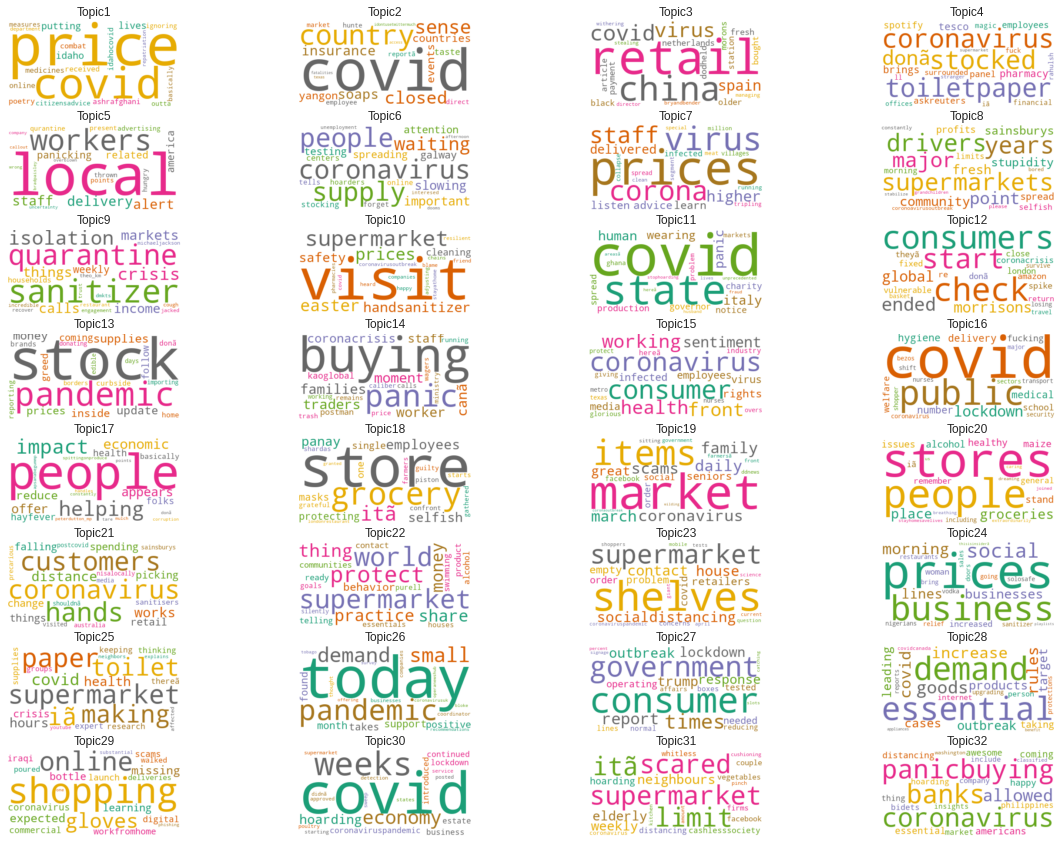

In [58]:
# import wordclouds
from wordcloud import WordCloud

# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(32):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(8, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])
plt.savefig(f"{images_dir}/LDA mallet 10 topics word cloud.png")
plt.show()